In [1]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [2]:
import numpy as np
import pandas as pd
import warnings
import sys
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

try:
    import reddit
except ModuleNotFoundError:
    sys.path.append("../")
    import reddit

In [5]:
# List of datasets to process
datasets = {'brasil': {'year':np.arange(2015,2020), 'color':'g'}, 
            'brasilivre': {'year':np.arange(2015,2020), 'color':'b'},
            'politics': {'year':np.arange(2016,2020), 'color':'r'}, 
            'askreddit': {'year':np.arange(2015,2017),'color':'k'}, 
            'the_donald': {'year':np.arange(2016,2017), 'color':'y'},
            'changemyview': {'year':np.arange(2014,2020), 'color':'m'},
            'politicalhumor': {'year':np.arange(2014,2020), 'color':'k'}}

features = ['author', 'num_comments_updated', 'score_updated', 'subreddit']

#Loads datasets
df = pd.DataFrame(columns=features)
for subreddit in datasets.keys():
    df_temp = reddit.load_years(subreddit, year_list=datasets[subreddit]['year'], fields=features)
    print('Done loading: ' + subreddit + '. DF size: {:0.2f} MB'.format(df_temp.memory_usage().sum()/1024**2))
    df = df.append(df_temp, sort=True)
    
df.reset_index(inplace=True,drop=True)
print('All datasets loaded. DF size: {:0.2f} MB'.format(df.memory_usage().sum()/1024**2))

#Cleans dataset
df.dropna(subset=['subreddit'], inplace=True)

Done loading: brasil. DF size: 9.19 MB
Done loading: brasilivre. DF size: 2.01 MB
Done loading: politics. DF size: 50.12 MB
Done loading: askreddit. DF size: 134.02 MB
Done loading: the_donald. DF size: 43.39 MB
Done loading: changemyview. DF size: 4.19 MB
Done loading: politicalhumor. DF size: 10.31 MB
All datasets loaded. DF size: 253.23 MB


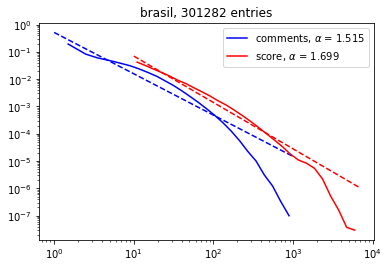

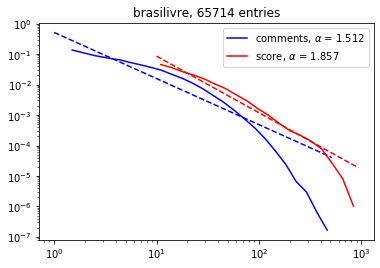

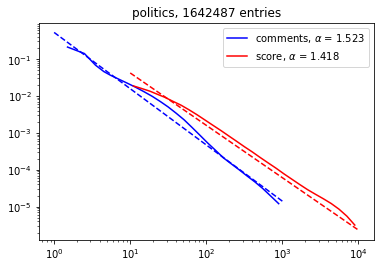

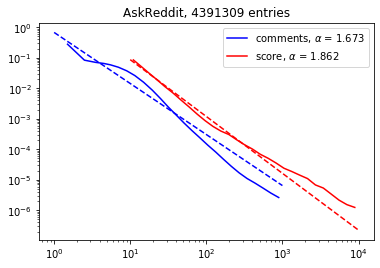

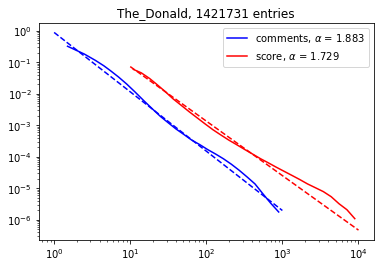

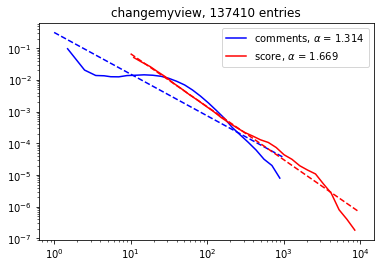

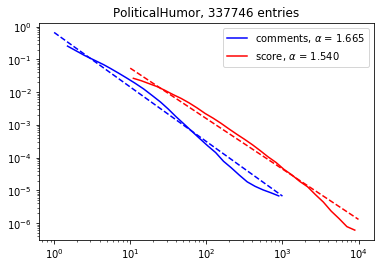

In [6]:
#Plots power-laws
subreddit_names = df['subreddit'].unique()
for subreddit in subreddit_names:
    plt.figure()
    ax = plt.gca()
    df_sub = df[df['subreddit']==subreddit]
    ax.set_title(subreddit + ', {:d} entries'.format(len(df_sub)))
    reddit.plot_powerlaws(df_sub, ax)   

In [ ]:
df2 = df.dropna(subset=['subreddit'])
print(df2['subreddit'].unique())

In [ ]:
#Creates plot structure
# fig = plt.figure(constrained_layout=True)
# gs = fig.add_gridspec(2,3)

#Color list


#Loads datasets and plots 
for subreddit in datasets.keys():
    
    print('Dataset: ' + subreddit)
    
    df = reddit.load_years(subreddit, year_list=datasets[subreddit]['year'], fields=features)
    print('Done loading. DF size: {:0.2f} MB'.format(df.memory_usage().sum()/1024**2))
    
    plt.figure()
    ax = plt.gca()
    ax.set_title(subreddit + ', {:d} entries'.format(len(df)))
    reddit.plot_powerlaws(df, ax, color=datasets[subreddit]['color'], xmax=1e3, xmin=1)
    
    #reddit.plot_powerlaw(df,'score_updated', ax=ax_pl_score)
    #reddit.plot_powerlaw(df,'num_comments_updated', ax=ax_pl_comm)
    #reddit.plot_usercomments(df, ax = ax_userdist)

In [ ]:
# for subreddit in datasets.items():
#     for year in datasets[subreddit]:
subreddit = 'brasilivre'
year = 2016
df = pd.read_csv('data/' + subreddit + '_' + str(year) + '.gzip', parse_dates=['created_utc'], index_col='created_utc')
#Remove comments with deleted users
df.drop(df[df["author"] == "[deleted]"].index, inplace=True)

In [ ]:
#Basic statistics
num_submissions = len(df)
unique_posters = len(df['author'].unique())
median_score = df['score_updated'].median()
median_ncomm = df['num_comments_updated'].median()

print('{:d} submissions from {:d} unique users.  Median score: {:3f}, Median number of comments: {:3f}'.format(num_submissions,unique_posters,median_score, median_ncomm))

#Shows most prolific authors
#print(df["author"].value_counts()[0:20])

In [ ]:
#Jointplot
sns.jointplot(x='score_updated', y='num_comments_updated', data=df, kind='reg', xlim=(1,1000), ylim=(1,1000))
mybins=np.logspace(0,np.log(100),50)
g = sns.JointGrid('score_updated', 'num_comments_updated', df,xlim=[1,100],ylim=[1,100])
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue',bins=mybins)
g.plot_joint(plt.scatter, color='black', edgecolor='black')
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

In [ ]:
#Plots n_comments and score distributions
n_comm = np.array(df['num_comments_updated'])
score = np.array(df['score_updated'])

fit_ncomm = powerlaw.Fit(n_comm[score>0], xmax=1e3, xmin=1)
fit_ncomm.plot_pdf(color='b')
fit_ncomm.power_law.plot_pdf(color='b', linestyle='--')
str_alpha_ncomm = r'$\alpha$ = {:0.3f}'.format(fit_ncomm.power_law.alpha)

fit_score = powerlaw.Fit(score[score>0],  xmax=1e4, xmin=10)
fit_score.plot_pdf(color='r')
fit_score.power_law.plot_pdf(color='r', linestyle='--')
str_alpha_score = r'$\alpha$ = {:0.3f}'.format(fit_score.power_law.alpha)

plt.legend(['comments', str_alpha_ncomm, 'score',str_alpha_score])